<a href="https://colab.research.google.com/github/magedyasse/Weather_Pred/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load  

In [26]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature Engineering

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation Metrics

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)


# Display all columns in pandas DataFrames
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('/content/weather.csv')

In [3]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
r , c = df.shape
print(f"Number Of Rows : {r}  and Number Of columns : {c}")

Number Of Rows : 366  and Number Of columns : 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## Missing values

In [8]:
print("Missing values in each column:")
print("-" * 40)
print(df.isnull().sum())
print("Total Missing values : =====> " ,df.isnull().sum().sum())

Missing values in each column:
----------------------------------------
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64
Total Missing values : =====>  47


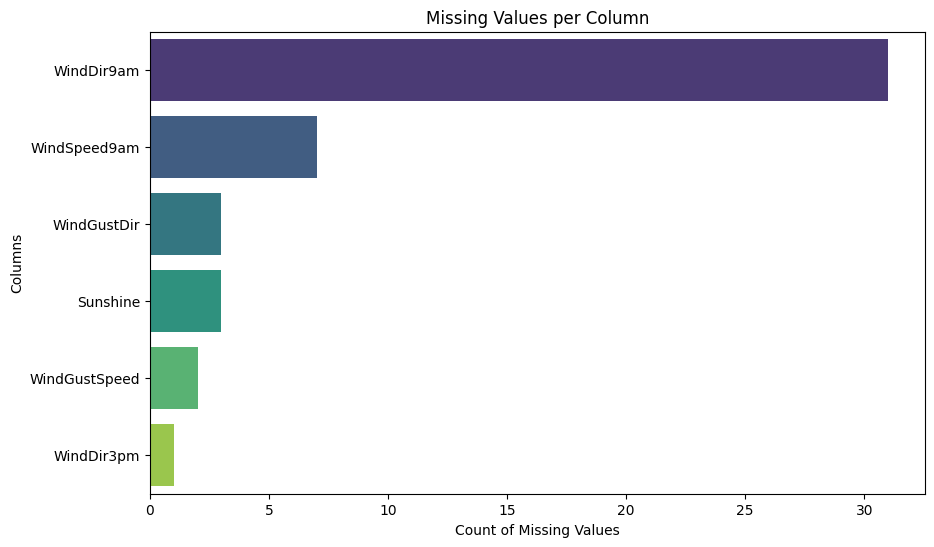

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10,6))
sns.barplot(
    x=missing_values.values,
    y=missing_values.index,
    hue=missing_values.index,
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

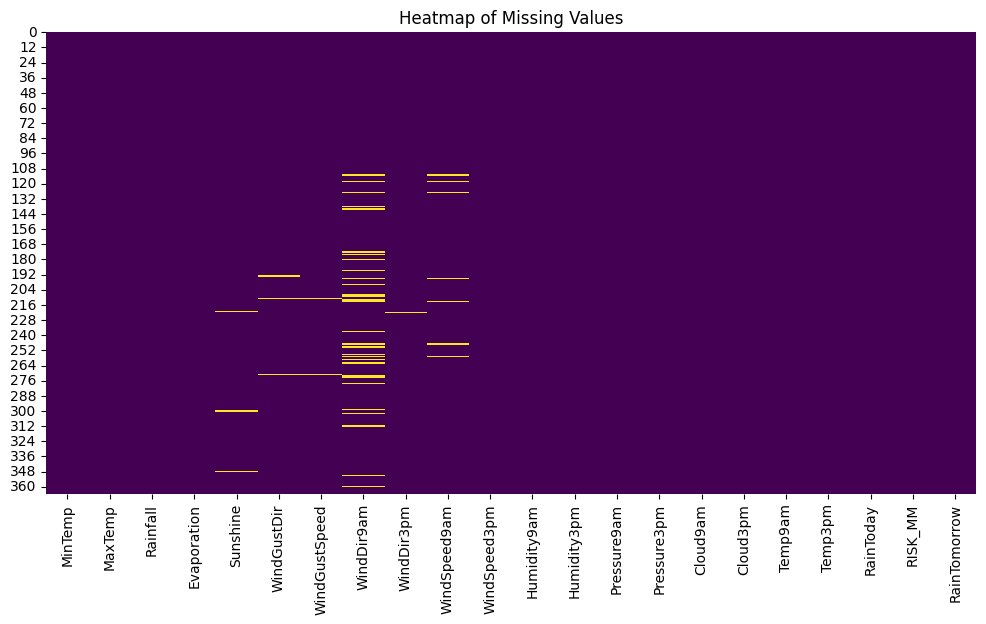

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


## Numerical columns


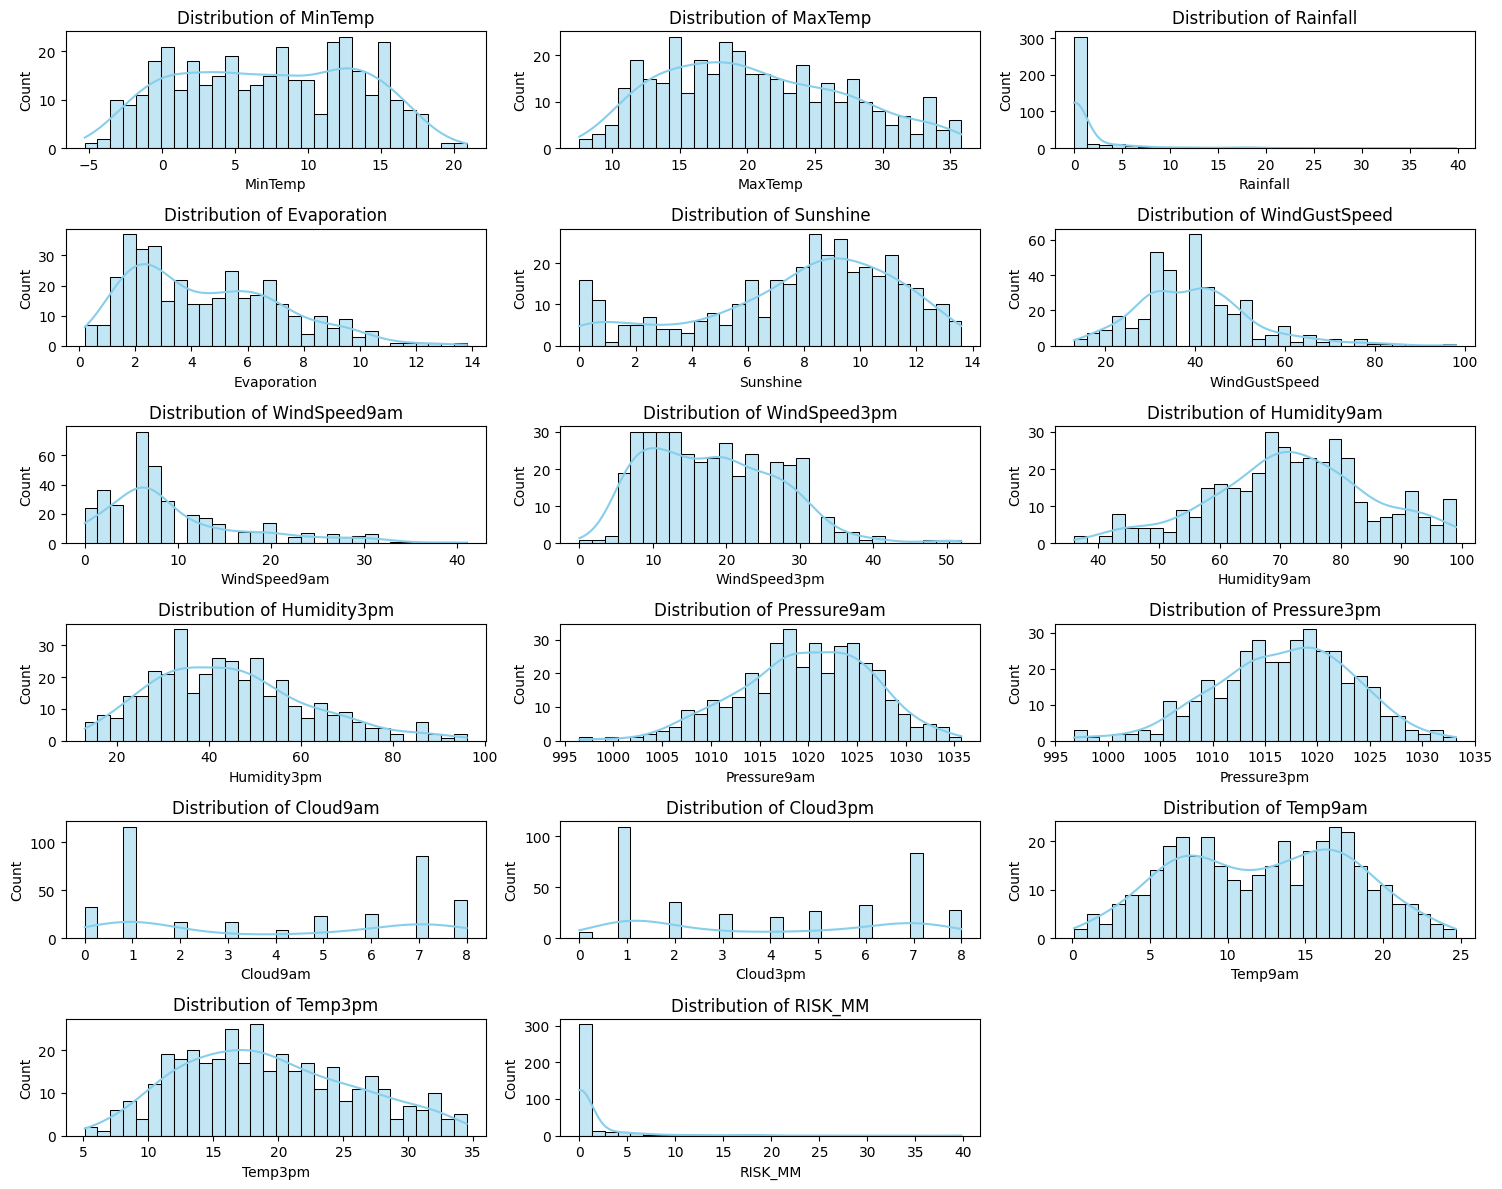

In [11]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


## Categorical columns


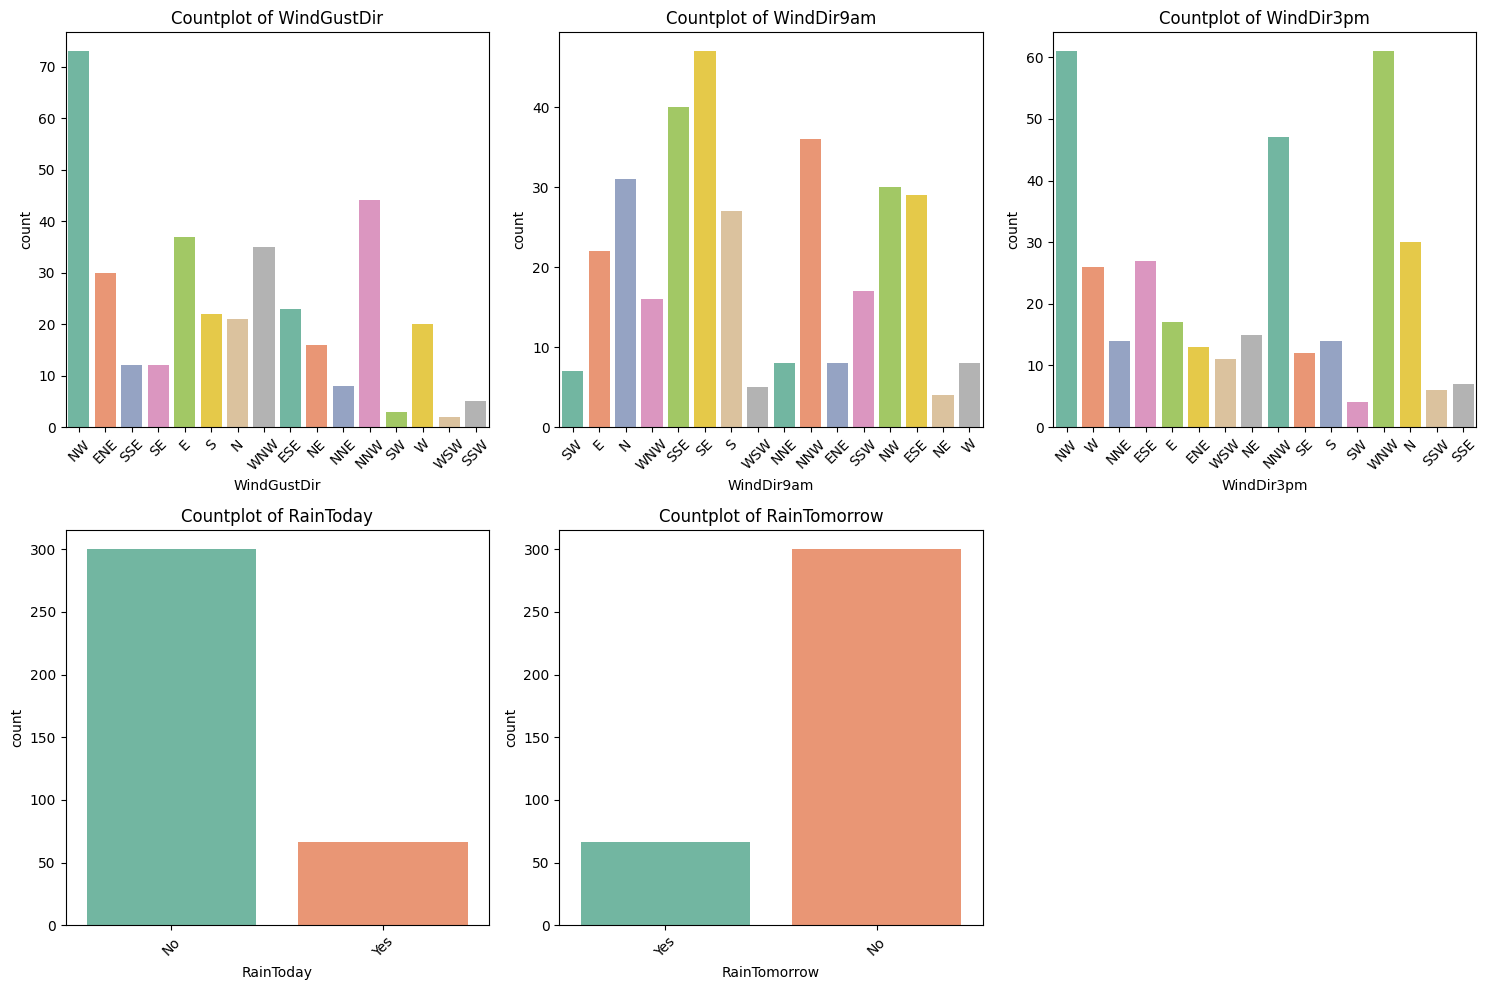

In [12]:
cat_cols = df.select_dtypes(exclude=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//3 + 1, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="Set2", legend=False)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# For numerical columns, fill with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Create correlation matrix


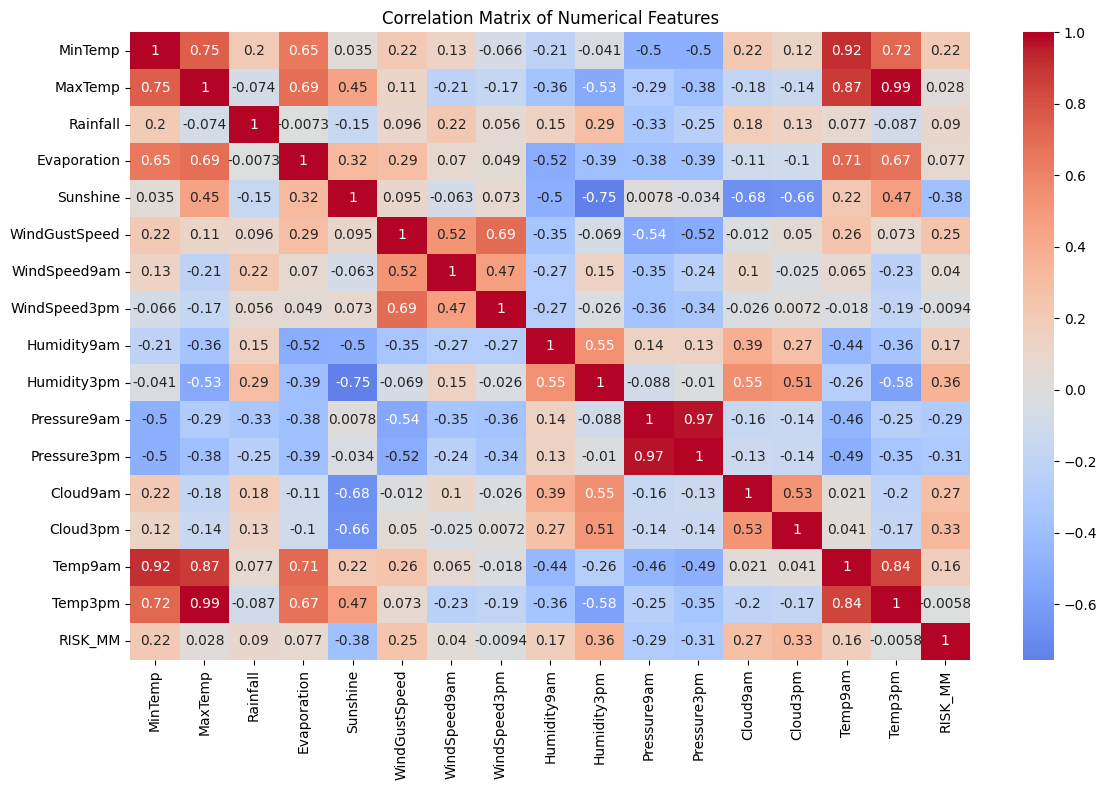

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Outliers

In [15]:
def get_outliers(df):

    num_cols = df.select_dtypes(include=np.number).columns
    outlier_indices = set()
    summary = []

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not col_outliers.empty:
            outlier_indices.update(col_outliers.index)
            summary.append({
                "Column": col,
                "Outliers_Count": len(col_outliers),
                "Outliers_Percentage": 100 * len(col_outliers) / len(df[col].dropna())
            })


    outliers_df = df.loc[list(outlier_indices)]
    summary_df = pd.DataFrame(summary).sort_values(by="Outliers_Count", ascending=False)

    return outliers_df, summary_df


In [16]:
outliers_df, summary_df = get_outliers(df)

print(" Summary of Outliers:")
print(summary_df)

 Summary of Outliers:
          Column  Outliers_Count  Outliers_Percentage
0       Rainfall              81            22.131148
9        RISK_MM              81            22.131148
3   WindSpeed9am              32             8.743169
2  WindGustSpeed              13             3.551913
8    Pressure3pm               4             1.092896
6    Humidity3pm               4             1.092896
4   WindSpeed3pm               3             0.819672
5    Humidity9am               2             0.546448
7    Pressure9am               2             0.546448
1    Evaporation               1             0.273224


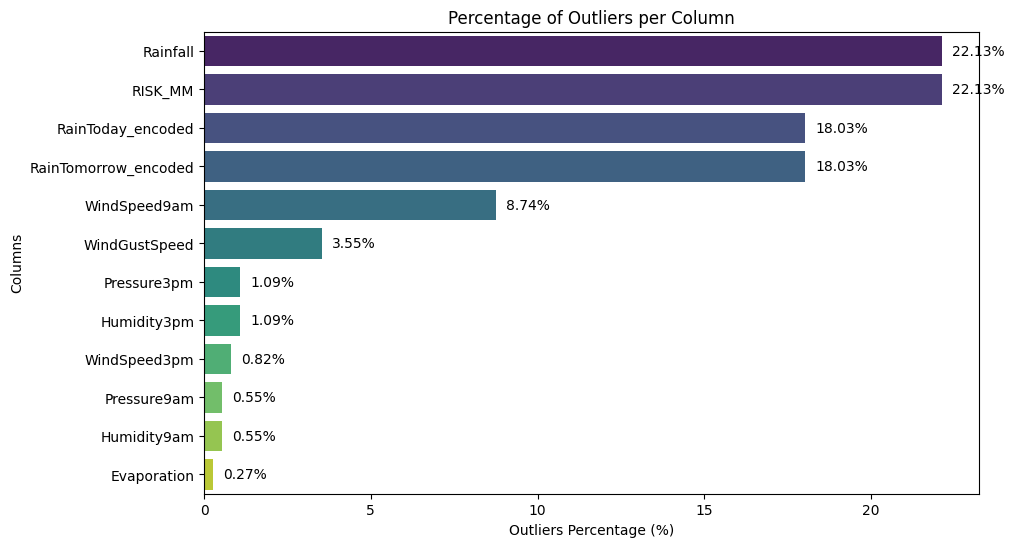

In [18]:
summary_outliers = pd.DataFrame({
    "Column": [
        "Rainfall","RISK_MM","RainToday_encoded","RainTomorrow_encoded",
        "WindSpeed9am","WindGustSpeed","Pressure3pm","Humidity3pm",
        "WindSpeed3pm","Pressure9am","Humidity9am","Evaporation"
    ],
    "Outliers_Count": [81,81,66,66,32,13,4,4,3,2,2,1],
    "Outliers_Percentage": [22.13,22.13,18.03,18.03,8.74,3.55,1.09,1.09,0.82,0.55,0.55,0.27]
})

summary_outliers = summary_outliers.sort_values(by="Outliers_Percentage", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Outliers_Percentage", y="Column", data=summary_outliers, palette="viridis", legend=False , hue="Column")

for index, value in enumerate(summary_outliers["Outliers_Percentage"]):
    plt.text(value + 0.3, index, f"{value:.2f}%", va="center")

plt.title("Percentage of Outliers per Column")
plt.xlabel("Outliers Percentage (%)")
plt.ylabel("Columns")
plt.show()


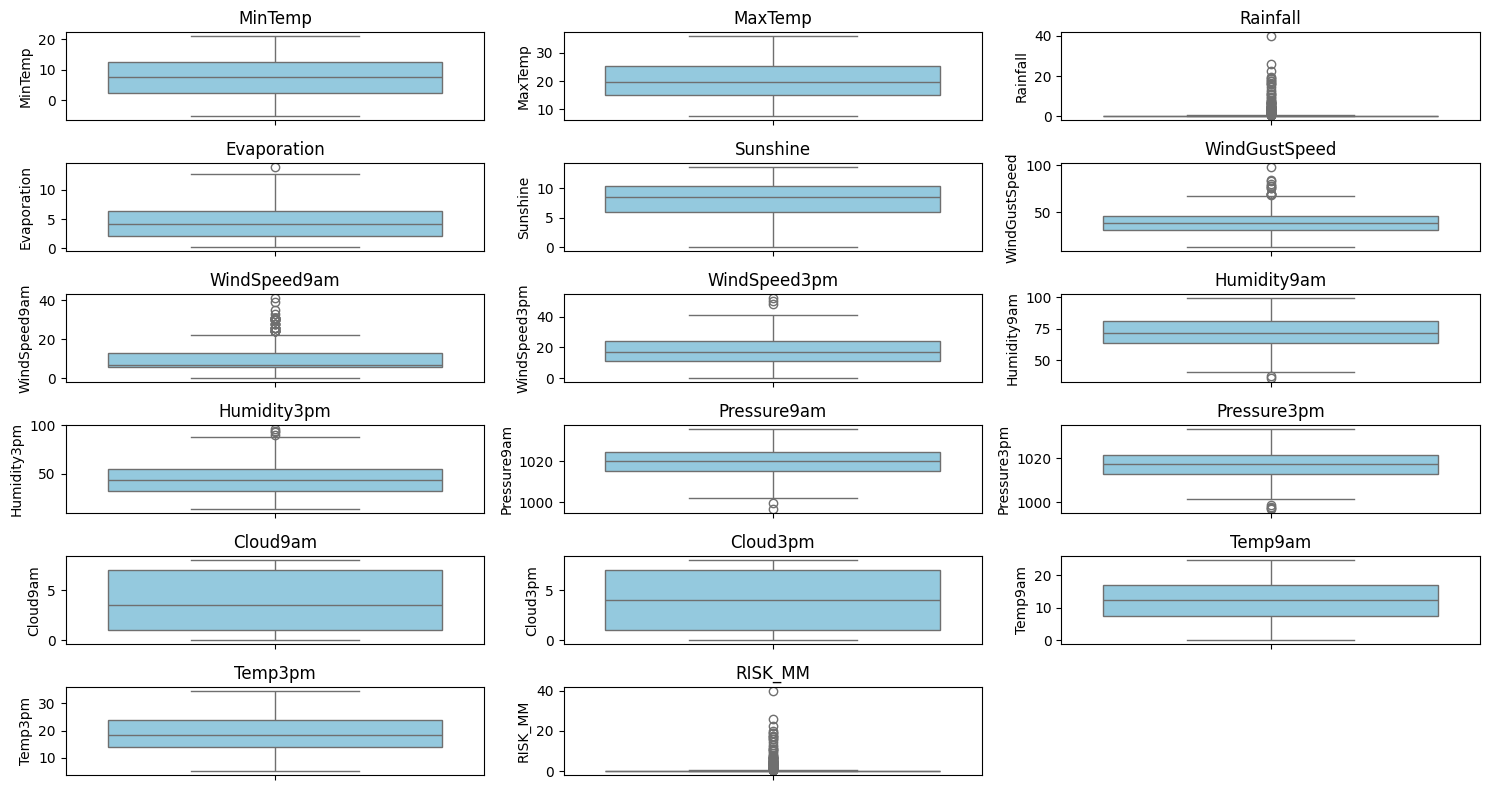

In [19]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


In [20]:
le = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])


In [21]:
X = df.drop(['RainTomorrow', 'RainTomorrow_encoded'], axis=1)
y = df['RainTomorrow_encoded']


In [22]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

## Feature Selection

In [23]:
numerical_correlations = df[numerical_cols].corrwith(pd.Series(y))
print("Correlations with target variable:")
print("-" * 30)
print(np.abs(numerical_correlations).sort_values(ascending=False))




Correlations with target variable:
------------------------------
RISK_MM          0.693024
Cloud3pm         0.388020
Sunshine         0.385382
Pressure3pm      0.370247
Humidity3pm      0.366882
Pressure9am      0.330047
Cloud9am         0.284579
WindGustSpeed    0.249608
MinTemp          0.233213
Humidity9am      0.185077
Temp9am          0.182170
Rainfall         0.133586
Evaporation      0.090528
WindSpeed9am     0.088758
MaxTemp          0.049228
WindSpeed3pm     0.042505
Temp3pm          0.011105
dtype: float64


# LazyPredict

In [ ]:
# ! pip install lazypredict

In [25]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# clf = LazyClassifier()
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)


# Modeling

##  1. DecisionTreeClassifier        
##  2. SVC            
##  3. LogisticRegression

In [27]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [28]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print("="*50)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    print("Cross-validation Accuracy:", cv_scores.mean())
    print("="*50, "\n")

Model: Decision Tree
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        92
         Yes       1.00      1.00      1.00        18

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Confusion Matrix:
 [[92  0]
 [ 0 18]]
Cross-validation Accuracy: 1.0

Model: SVC
Accuracy: 0.9636363636363636

Classification Report:
               precision    recall  f1-score   support

          No       0.96      1.00      0.98        92
         Yes       1.00      0.78      0.88        18

    accuracy                           0.96       110
   macro avg       0.98      0.89      0.93       110
weighted avg       0.97      0.96      0.96       110

Confusion Matrix:
 [[92  0]
 [ 4 14]]
Cross-validation Accuracy: 0.9727508330248057

Model: Logistic Regression
Accuracy: 0.990909090909091

Classifica

In [37]:
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(pipeline, X, y, cv=5).mean()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "CV Accuracy": cv_scores,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    })

results_df = pd.DataFrame(results).drop("Confusion Matrix", axis=1)
print(results_df)



                 Model  Accuracy  CV Accuracy
0        Decision Tree  1.000000     1.000000
1                  SVC  0.963636     0.972751
2  Logistic Regression  0.990909     0.997297


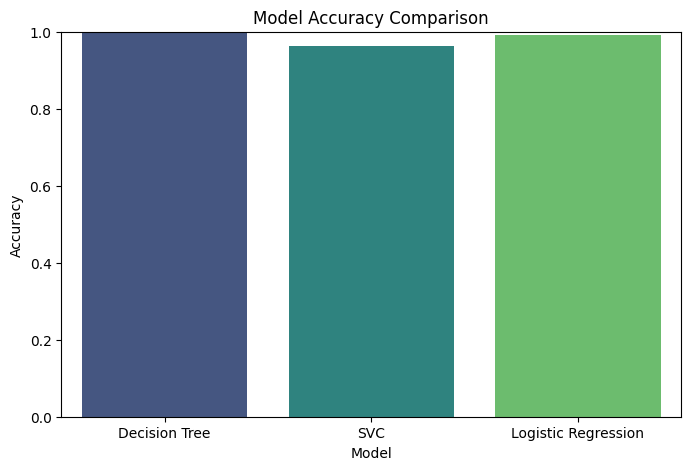

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis", legend=False , hue="Model")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


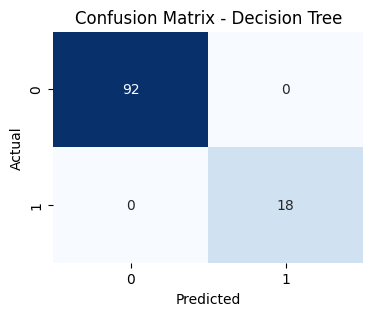

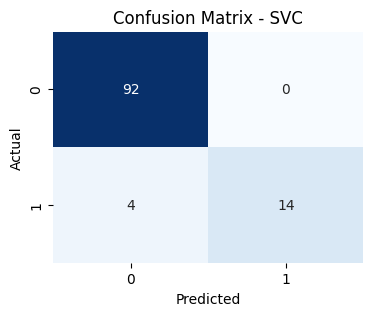

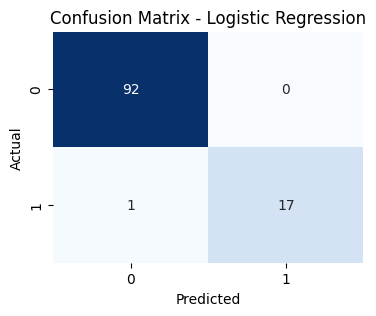

In [38]:
for res in results:
    cm = res["Confusion Matrix"]
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {res['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




-------------------------------------



# Neural Networks for Classification

# Step 0: Import libraries


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Step 1: Load the dataset


In [88]:
df = pd.read_csv('/content/weather.csv')

# Step 2: Handle missing values


In [89]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Step 3: Encode categorical columns


In [90]:
le = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

# Step 4: Prepare X and y


In [91]:
X = df.drop(['RainTomorrow', 'RainTomorrow_encoded'] + list(categorical_cols), axis=1)
y = df['RainTomorrow_encoded']

# Step 5: Scale numerical features




In [92]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 6: Split into train/val/test


In [93]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)



# Step 7: Build Neural Network


In [96]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Input(shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Step 8: Train the model


In [97]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4055 - loss: 0.9428 - val_accuracy: 0.8219 - val_loss: 0.5015
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8019 - loss: 0.5672 - val_accuracy: 0.8219 - val_loss: 0.5301
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7641 - loss: 0.6741 - val_accuracy: 0.8356 - val_loss: 0.4631
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8215 - loss: 0.4375 - val_accuracy: 0.8630 - val_loss: 0.4186
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7957 - loss: 0.4763 - val_accuracy: 0.8630 - val_loss: 0.4096
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8323 - loss: 0.4044 - val_accuracy: 0.8630 - val_loss: 0.3846
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8596 - loss: 0.3544 - val_accuracy: 0.8630 - val_loss: 0.3709
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8070 - loss: 0.3921 - val_accuracy: 0.8767 - val_loss: 0.3570


 # Step 9: Plot loss and accuracy


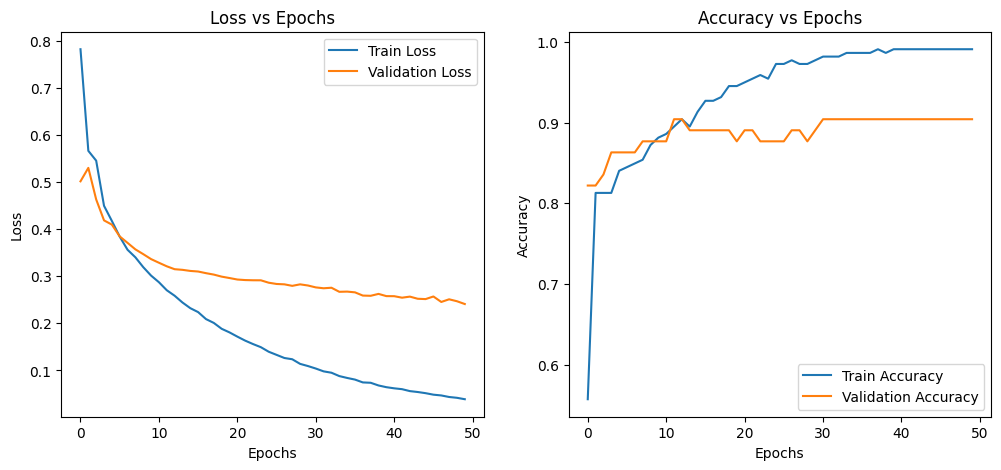

In [98]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Step 10: Evaluate on test set


In [99]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(" Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
 Accuracy on Test Set: 0.9459459459459459

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.91      0.77      0.83        13

    accuracy                           0.95        74
   macro avg       0.93      0.88      0.90        74
weighted avg       0.94      0.95      0.94        74


 Confusion Matrix:
 [[60  1]
 [ 3 10]]


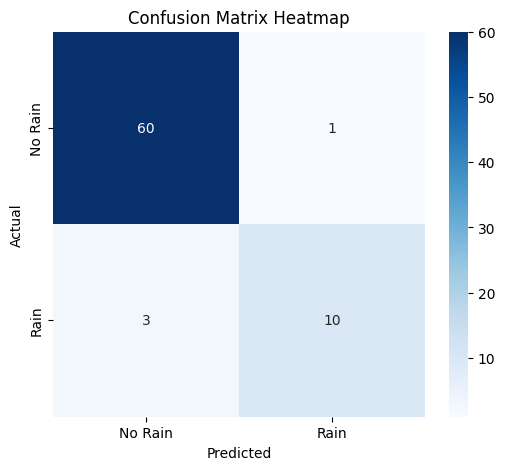

In [100]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()